<a href="https://colab.research.google.com/github/Ali-Ahmadi/Digital-Image-Processing/blob/master/05_Spatial_Filtering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering - Spatial Filtering
![convolution](https://static1.squarespace.com/static/5a8dbb09bff2006c33266320/t/5baff4441905f4c995f31810/1538257990895/)

In this section, you will see how to define different kernels (linear or non-linear) and apply them on digital images using OpenCV in python.

You can find the complete details and information about the sytax and codes in OpenCV [docs center](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20boxFilter(InputArray%20src,%20OutputArray%20dst,%20int%20ddepth,%20Size%20ksize,%20Point%20anchor,%20bool%20normalize,%20int%20borderType). We highly recommand looking at the documentations. _OpenCV documents_ and tutorials are one of the best sources of learning image processing and how to code for it.

Import required packages for image filtering.

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

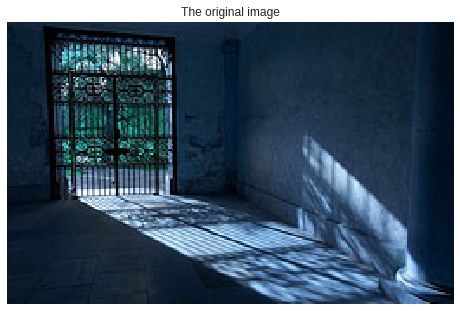

In [3]:
ref = cv2.imread('hist_lowkey.jpg')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

There are two key factors in applying a filter on an image in digital image processing; __1)__ the kernal type (and size), and __2)__ the padding method (padding is the extrapolation procedure which describes the kernel output over the borders of the image).

There are different methods for defining the kernel and introducing the padding method in OpenCV. Unlike MATLAB that the kernel parameters are defined very easily, in OpenCV you have more control over the parameters and should take a longer way to reach the goal.

Below, you see how to define a very simple averaging kernel and apply it on your images.

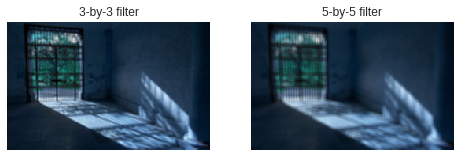

In [10]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

The complete command for performing 2D spatial filter over images in OpenCV is cv2.filter2D with the following list of parameters. Some of the parameters are not necessarily used. 

**cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])**
**src** – input image.

**dst** – output image of the same size and the same number of channels as src.

**ddepth** –
desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:

src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_64F, ddepth = -1/CV_64F

when ddepth=-1, the output image will have the same depth as the source.

**kernel** – convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.

**anchor** – anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.

_The anchor can be replaced by a single -1, indicating that the center of the kernel is on its middle pixel._

**delta** – optional value added to the filtered pixels before storing them in dst.

**borderType** – pixel extrapolation method (see [borderInterpolate()](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#int%20borderInterpolate(int%20p,%20int%20len,%20int%20borderType) for details).

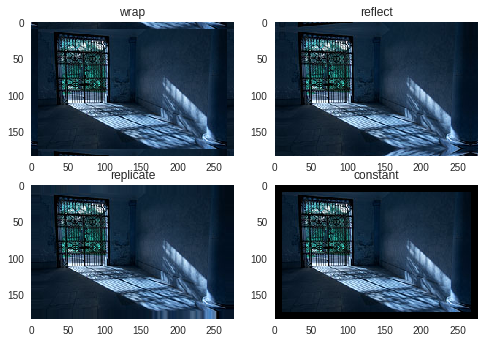

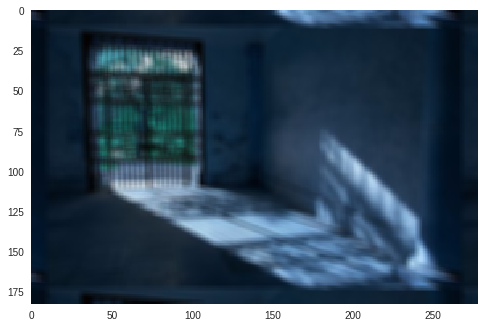

In [5]:
img2 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_CONSTANT, 10)

plt.subplot(221)
plt.imshow(img2)
plt.grid(False)
plt.title('wrap')

plt.subplot(222)
plt.imshow(img3)
plt.grid(False)
plt.title('reflect')

plt.subplot(223)
plt.imshow(img4)
plt.grid(False)
plt.title('replicate')

plt.subplot(224)
plt.imshow(img5)
plt.grid(False)
plt.title('constant')

plt.show()

dst2 = cv2.filter2D(img2,-1,kernel)

plt.imshow(dst2)
plt.grid(False)

plt.show()